In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

In [2]:
CS137Peaks = np.array([165.80])
CS137Energy = np.array([661.7]) #KeV

In [3]:
BA133Peaks = np.array([21.42, 76.92, 90.52])
BA133Energy = np.array([81.0, 302.9, 356.0])

In [4]:
Mn54Peaks = np.array([207.48])
Mn54Energy = np.array([834.8])

In [5]:
Na22Peaks = np.array([128.54])
Na22Energy = np.array([511.0])

In [6]:
CO57Peaks = np.array([31.79])
CO57Energy = np.array([122.1])

In [7]:
Peaks = np.hstack([CS137Peaks,BA133Peaks,Mn54Peaks,Na22Peaks,CO57Peaks])

In [8]:
Peaks

array([ 165.8 ,   21.42,   76.92,   90.52,  207.48,  128.54,   31.79])

In [9]:
Energy = np.hstack([CS137Energy,BA133Energy,Mn54Energy,Na22Energy,CO57Energy])

In [10]:
Energy

array([ 661.7,   81. ,  302.9,  356. ,  834.8,  511. ,  122.1])

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.]),
 <a list of 10 Text yticklabel objects>)

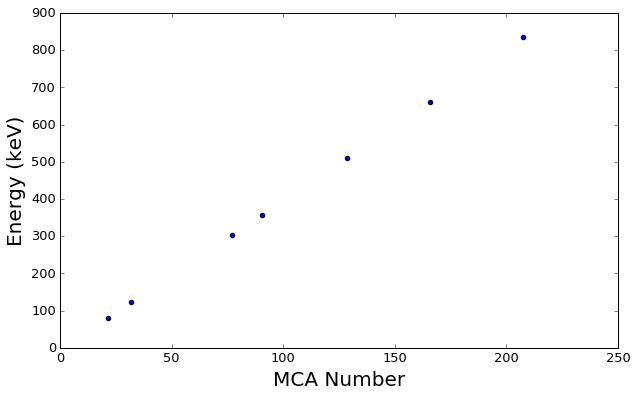

In [11]:
plt.figure(figsize=(10,6));
plt.scatter(Peaks,Energy);

plt.xlabel('MCA Number',fontsize=20);
plt.ylabel('Energy (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
#plt.savefig('Sample')

In [12]:
def myfun(N,a,b,c):
    ans = a + b*N + c*N**2  # this is y, "the function to be fit"
    return ans

In [13]:
p0 = [-2,1,0]

In [14]:
xlots = np.linspace(0,240)  # need lots of data points for smooth curve
yfit = np.zeros((len(Peaks),xlots.size))

plsq, pcov = curve_fit(myfun, Peaks, Energy, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
a = plsq[0]
da = np.sqrt(pcov[0,0])
b = plsq[1]
db = np.sqrt(pcov[1,1])
c = plsq[2]
dc = np.sqrt(pcov[2,2])

yfit = myfun(xlots,plsq[0],plsq[1],plsq[2])  # use fit results for a, b, c
    
print('a = %.7f +/- %.7f' % (plsq[0], np.sqrt(pcov[0,0])))
print('b = %.7f +/- %.7f' % (plsq[1], np.sqrt(pcov[1,1])))
print('c = %.7f +/- %.7f' % (plsq[2], np.sqrt(pcov[2,2])))

a = -3.2717280 +/- 0.8945287
b = 3.9293985 +/- 0.0192341
c = 0.0005215 +/- 0.0000838


### 1

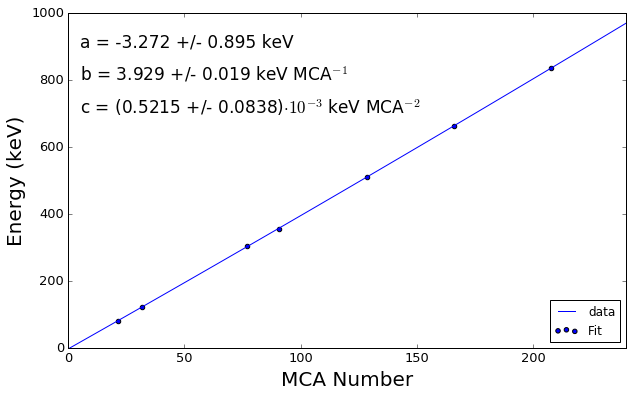

In [16]:
plt.figure(figsize=(10,6));
plt.scatter(Peaks,Energy);
plt.xlim(0,240)
plt.ylim(0,1000)
plt.xlabel('x (mm)');
plt.ylabel('y (mm)');
plt.plot(xlots,yfit);
plt.legend(['data','Fit'],loc='lower right');
plt.text(5,900,'a = %.3f +/- %.3f keV' % (plsq[0], np.sqrt(pcov[0,0])),size=17)
plt.text(5,800,'b = %.3f +/- %.3f keV MCA$^{-1}$' % (plsq[1], np.sqrt(pcov[1,1])),size=17)
plt.text(5,700,'c = (%.4f +/- %.4f)$\cdot 10^{-3}$ keV MCA$^{-2}$' % (plsq[2]*1e3, np.sqrt(pcov[2,2])*1e3),size=17)
plt.xlabel('MCA Number',fontsize=20);
plt.ylabel('Energy (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.savefig('LinearMCAFit')

In [43]:
def deltaE(N,dN):
    daN = np.sqrt((da/a)**2 + (dN/N)**2)*(a*N)

    dbN2 = np.sqrt((db/b)**2 + 4*(dN/N)**2)*(b*N**2)

    dcN3 = np.sqrt((dc/c**2) + 9*(dN/N)**2)*(c*N**3)

    dEMeas = np.sqrt(daN**2 + dbN2**2 + dcN3**2)*1e-3 #Convert to KeV
    
    return dEMeas

In [48]:
N = np.array([102.40]) #Channel number of 60 degree scattered photopeak
dN = np.array([9.00])
theta = np.array([60])*np.pi/180

In [49]:
EMeas = myfun(N,a,b,c)
EMeas

array([ 404.56728438])

In [50]:
dEMeas = deltaE(N,dN)
dEMeas

array([ 12.21079106])

In [51]:
Eo = 661.7 #Initial keV energy of gamma rays (before scattering) 
mc2 = 511 #electron mass in keV

In [52]:
def ECompton(Eo,mc2,theta):
    return Eo/(1+(Eo/mc2)*(1-np.cos(theta)))

In [53]:
EComp = ECompton(Eo,mc2,theta)
EComp

array([ 401.64958128])

### 2

1. Test how the energy of scattered atoms varies with scattering angle
2. Use (1) to determine keV mass of electron
3. Which of Thomson and Klein-Nishina differential cross section is a better description?

(-3.141592653589793, 3.141592653589793)

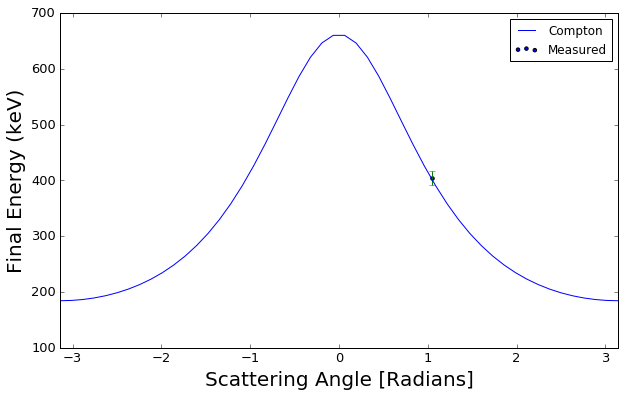

In [57]:
thetas = np.linspace(-np.pi,np.pi,50);

plt.figure(figsize=(10,6));
plt.plot(thetas,ECompton(Eo,mc2,thetas),label='Compton');
plt.errorbar(theta,EMeas,dEMeas);
plt.scatter(theta,EMeas,dEMeas,label='Measured');
plt.legend();

plt.xlabel('Scattering Angle [Radians]',fontsize=20);
plt.ylabel('Final Energy (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.xlim(-np.pi,np.pi);
#plt.savefig('Sample')

In [60]:
def Thomson(theta):
    ro = 2.82*1e-15
    return (1/2)*(ro**2)*(1+np.cos(theta)**2) #set b = 1

In [68]:
def KleinNishina(theta):
    ro = 2.82*1e-15
    gamma = Eo/mc2
    
    return (1/2)*(ro**2)*(1+np.cos(theta)**2)*((1+gamma*(1-np.cos(theta)))**(-2))*(1+((gamma*(1-np.cos(theta)))**2)/((1+np.cos(theta)**2)*(1+gamma*(1-np.cos(theta)))))

(-3.141592653589793, 3.141592653589793)

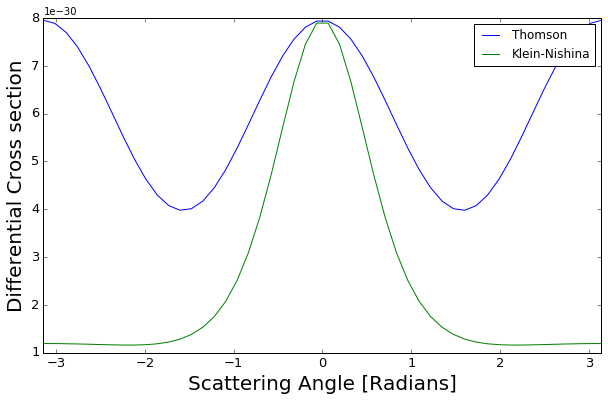

In [69]:
thetas = np.linspace(-np.pi,np.pi,50);

plt.figure(figsize=(10,6));
plt.plot(thetas,Thomson(thetas),label='Thomson');
plt.plot(thetas,KleinNishina(thetas),label='Klein-Nishina');
plt.legend();

plt.xlabel('Scattering Angle [Radians]',fontsize=20);
plt.ylabel('Differential Cross section',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.xlim(-np.pi,np.pi);
#plt.savefig('Sample')